In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection
from sklearn import tree
from sklearn import linear_model

In [2]:
msft = pd.read_csv('C:/Users/steve/Documents/bootcamp/nu-chi-data-pt-04-2021-u-c/01-Curriculum/msft_stock.csv')

In [3]:
msft = msft[['Date', 'Close']]

In [4]:
new_msft = msft.loc[884:1167]

In [9]:
msft.shape

(1167, 2)

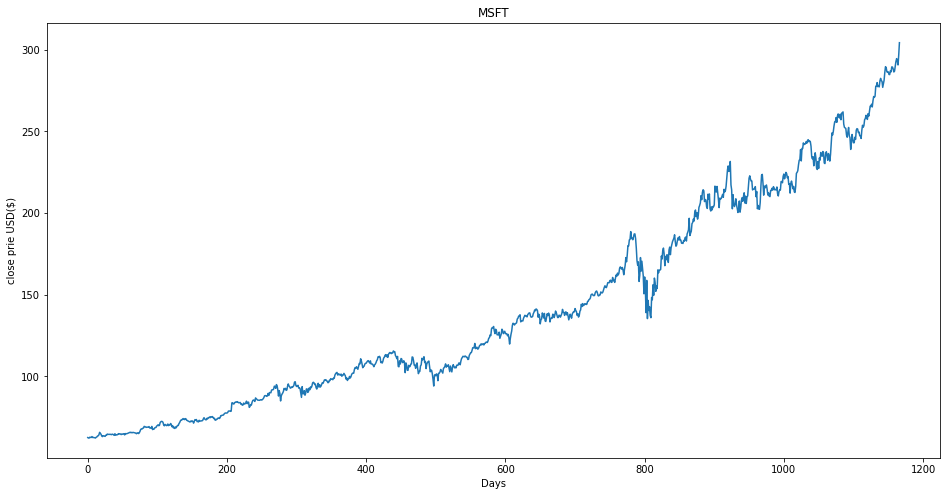

In [17]:
plt.figure(figsize =(16,8))
plt.title('MSFT')
plt.xlabel('Days')
plt.ylabel('close prie USD($)')
plt.plot(msft['Close'])
plt.show()

In [18]:
close_price = msft[['Close']]

In [19]:
close_price

,Close
0,62.580002
1,62.299999
2,62.299999
3,62.840000
4,62.639999
...,...
1162,294.600006
1163,293.079987
1164,290.730011
1165,296.769989


In [20]:
future_days = 30

close_price['prediction'] = close_price[['Close']].shift(-future_days)

In [21]:
close_price

,Close,prediction
0,62.580002,64.529999
1,62.299999,64.519997
2,62.299999,64.620003
3,62.840000,64.489998
4,62.639999,64.360001
...,...,...
1162,294.600006,NaN
1163,293.079987,NaN
1164,290.730011,NaN
1165,296.769989,NaN


In [29]:
X= np.array(close_price.drop(['prediction'],1))[:-future_days]

C:\Users\steve\AppData\Local\Temp/ipykernel_23680/1274731598.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X= np.array(close_price.drop(['prediction'],1))[:-future_days]


In [30]:
print(x)

[[ 62.58000183]
 [ 62.29999924]
 [ 62.29999924]
 ...
 [279.92999268]
 [277.42001343]
 [277.94000244]]


In [31]:
y= np.array(close_price['prediction'])[:-future_days]

In [32]:
print(y)

[ 64.52999878  64.51999664  64.62000275 ... 290.73001099 296.76998901
 304.35998535]


In [39]:
#split the data into 75% training and 25% testing 
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=25)

In [48]:
#create the models
#create the decision tree regressor model
tree = sklearn.tree.DecisionTreeRegressor().fit(x_train, y_train)

In [49]:
#linear regression model
lr = sklearn.linear_model.LinearRegression().fit(x_train, y_train)

In [52]:
x_future = close_price.drop(['prediction'], 1)[:-future_days]

C:\Users\steve\AppData\Local\Temp/ipykernel_23680/4106418182.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = close_price.drop(['prediction'], 1)[:-future_days]


In [53]:
x_future = x_future.tail(future_days)

In [54]:
x_future = np.array(x_future)
x_future

array([[249.30999756],
       [249.67999268],
       [247.3999939 ],
       [247.30000305],
       [245.71000671],
       [250.78999329],
       [253.80999756],
       [252.57000732],
       [253.58999634],
       [257.23999023],
       [257.89001465],
       [259.89001465],
       [258.35998535],
       [257.38000488],
       [260.8999939 ],
       [259.42999268],
       [262.63000488],
       [265.51000977],
       [265.26998901],
       [266.69000244],
       [265.01998901],
       [268.72000122],
       [271.3999939 ],
       [270.8999939 ],
       [271.6000061 ],
       [277.6499939 ],
       [277.66000366],
       [279.92999268],
       [277.42001343],
       [277.94000244]])

In [55]:
#show the model tree prediction
tree_prediction = tree.predict(x_future)

In [57]:
print(tree_prediction)

[277.32000732 280.98001099 282.51000977 281.02999878 280.75
 277.01000977 279.32000732 281.3999939  286.14001465 250.78999329
 289.04998779 286.54000854 286.22000122 286.5        284.91000366
 284.82000732 287.11999512 289.51998901 289.51998901 289.45999146
 288.32998657 286.44000244 286.95001221 289.80999756 292.8500061
 294.6000061  293.07998657 290.73001099 296.76998901 304.35998535]


In [58]:
#show model linear regression predciton
lr_prediction = lr.predict(x_future)

In [59]:
lr_prediction 

array([260.11656318, 260.50267023, 258.12338582, 258.01904074,
       256.35980585, 261.66100732, 264.81252177, 263.51853448,
       264.5829403 , 268.39187813, 269.07020873, 271.15730144,
       269.56064495, 268.5379899 , 272.21126161, 270.67724719,
       274.01660827, 277.02202686, 276.77155408, 278.25340392,
       276.51066749, 280.37180174, 283.16849833, 282.64672515,
       283.37722034, 289.69066305, 289.7011087 , 292.06994746,
       289.45066777, 289.99330041])

In [61]:
#visualized the data
predictions = tree_prediction 
valid = close_price[X.shape[0]:]

C:\Users\steve\AppData\Local\Temp/ipykernel_23680/4170329595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction'] = predictions


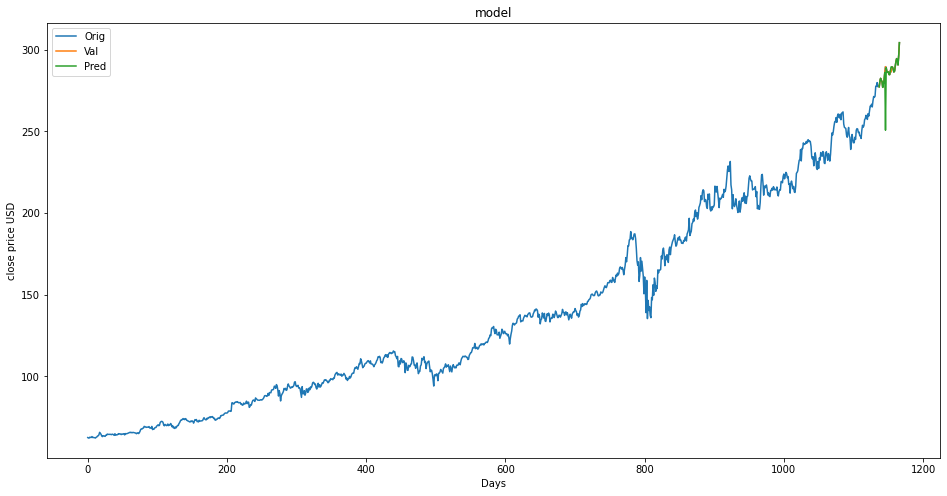

In [68]:
valid['prediction'] = predictions 
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Days')
plt.ylabel('close price USD')
plt.plot(close_price['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()

C:\Users\steve\AppData\Local\Temp/ipykernel_23680/4052443177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction'] = predictions


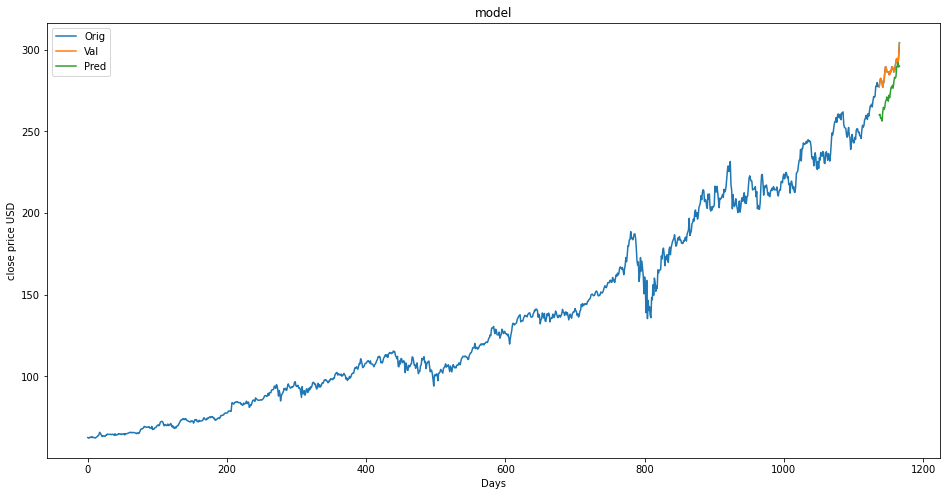

In [71]:
predictions = lr_prediction 
valid = close_price[X.shape[0]:]
valid['prediction'] = predictions 
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Days')
plt.ylabel('close price USD')
plt.plot(close_price['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()